In [1]:
import verilog_reader_package as vr
import pandas as pd
import numpy as np
import sys
sys.setrecursionlimit(100000) #修改递归深度上限


file_name='./verilog_netlist_for_test/test2.v'
txt=vr.read_file(file_name)

input_list,output_list,node_list,index_node,node_wire_insub,node_wire_outsub,module_name=vr.netlist_extract(txt)

node_wiredf=pd.DataFrame([node_list,node_wire_insub,node_wire_outsub]).T
node_wiredf = node_wiredf.rename(columns={0: 'node', 1: 'port', 2: 'wire'})

node_wiredf.to_csv('node_wiredf.csv')
node_wiredf

adj_mat=vr.adj_generator(input_list,index_node,node_wire_outsub)
np.savetxt("adj.txt",adj_mat,fmt="%d", delimiter=",")
adj_mat_pd=pd.DataFrame(adj_mat)
adj_mat_pd.to_csv('adj_mat.csv')

graph=vr.Mygraph(len(adj_mat[0]),adj_mat)

print(graph.getMatrixValue)

dic_in,dic_out=vr.node2io(input_list,output_list,index_node,node_wire_outsub)


<bound method Mygraph.getMatrixValue of <verilog_reader_package.Mygraph object at 0x000002C6D22D7BE0>>


In [22]:
num_node=np.shape(adj_mat)[0]
edge=[]
for i in range(num_node):
    for j in range(i+1,num_node):
        if adj_mat[i][j]==1:
            edge.append((i,j))

In [23]:
edge

[(1, 120),
 (1, 122),
 (1, 123),
 (1, 124),
 (1, 477),
 (1, 588),
 (2, 120),
 (2, 258),
 (2, 300),
 (2, 322),
 (2, 378),
 (2, 444),
 (2, 589),
 (2, 655),
 (2, 788),
 (2, 844),
 (2, 888),
 (2, 1143),
 (3, 14),
 (3, 25),
 (3, 91),
 (3, 147),
 (3, 158),
 (3, 1177),
 (3, 1199),
 (3, 1210),
 (4, 5),
 (4, 101),
 (4, 359),
 (4, 369),
 (4, 476),
 (4, 481),
 (4, 482),
 (4, 1237),
 (4, 1241),
 (4, 1251),
 (4, 1252),
 (4, 1253),
 (5, 8),
 (5, 101),
 (5, 646),
 (5, 647),
 (5, 725),
 (5, 726),
 (5, 969),
 (5, 1252),
 (6, 7),
 (6, 9),
 (6, 17),
 (6, 479),
 (6, 482),
 (6, 483),
 (6, 630),
 (6, 1227),
 (6, 1229),
 (6, 1233),
 (6, 1236),
 (6, 1246),
 (6, 1247),
 (6, 1249),
 (7, 8),
 (7, 18),
 (7, 28),
 (7, 46),
 (7, 71),
 (7, 97),
 (7, 309),
 (7, 310),
 (7, 320),
 (7, 330),
 (7, 340),
 (7, 631),
 (7, 632),
 (7, 638),
 (7, 639),
 (7, 661),
 (7, 662),
 (7, 721),
 (8, 9),
 (8, 68),
 (8, 1081),
 (8, 1087),
 (8, 1139),
 (8, 1180),
 (8, 1219),
 (8, 1250),
 (9, 17),
 (9, 271),
 (9, 479),
 (9, 482),
 (9, 483),

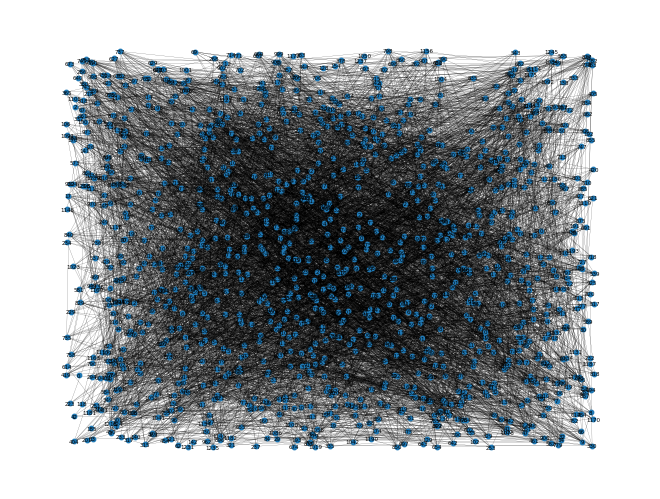

In [42]:
import matplotlib.pyplot as plt
import networkx as nx
 
G = nx.Graph() #定义了一个空图

G.add_nodes_from(index_node) #同时加2和3两个节点
G.add_edges_from(edge) #添加边

nx.draw(G, with_labels=True,node_size=10,font_size=4,width=0.1,pos = nx.random_layout(G))
plt.show()

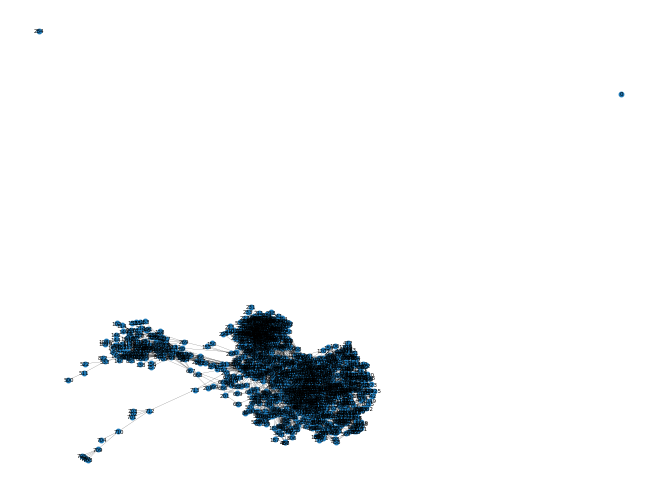

In [46]:
nx.draw(G, with_labels=True,node_size=10,font_size=4,width=0.1,pos = nx.spring_layout(G))
plt.show()

In [29]:
node_list[0]

'sky130_fd_sc_hd__buf_2 U0'